# 🎬 Netflix Content Analysis


**Objective:** Explore Netflix’s content library to identify trends in content types, release years, genres, durations, and more.

**Key Insights:**
- 📊 Movies dominate Netflix’s content compared to TV Shows
- 🌍 US, India, and UK are top contributing countries
- 🕒 Most movies fall in the 90–119 minute range
- 🔥 Drama, Comedy, and International content are the most common genres
- 📆 Content additions peaked around 2019–2020

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Dataset

In [3]:
# For better visuals
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Color Theme

In [ ]:
import seaborn as sns
sns.set_palette("Blues")

# Data Cleaning

In [14]:
df['date_added'] = df['date_added'].astype(str).str.strip()                   # Strip leading/trailing whitespace

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [18]:
#Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [19]:
df[['date_added', 'year_added', 'month_added']].head()


,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


In [20]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

In [23]:
# Fill missing country with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Fill missing cast with 'Not Available'
df['cast'] = df['cast'].fillna('Not Available')

# Fill missing director with 'Not Available'
df['director'] = df['director'].fillna('Not Available')


# Drop rows 
df.dropna(subset=['rating', 'duration', "date_added", "year_added", "month_added"], inplace=True)

In [24]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   float64       
 13  month_added   8790 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


# Exploratory Data Analysis (EDA) 

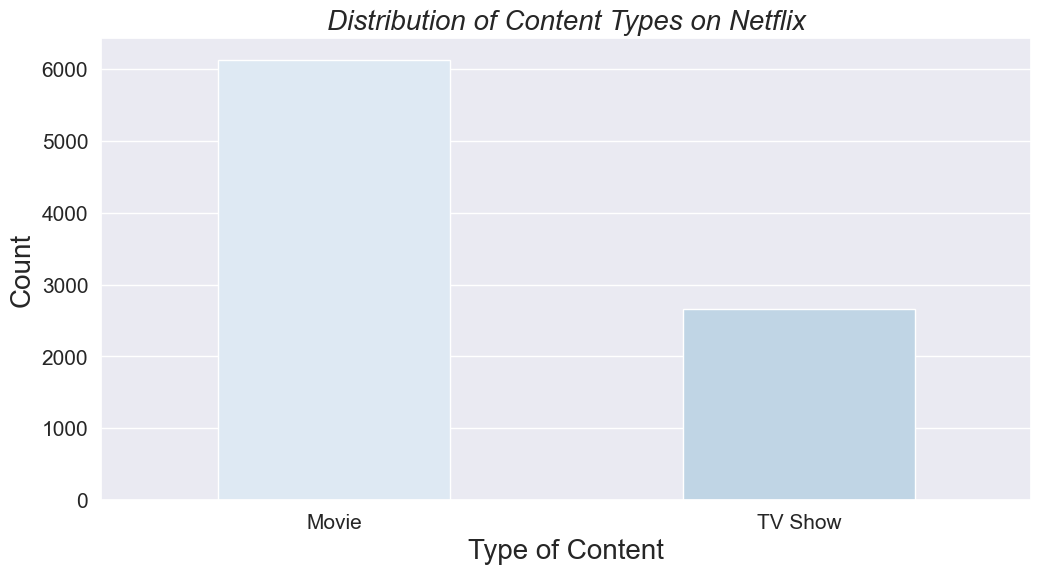

In [121]:
sns.countplot(data=df, x='type', hue='type', legend=False, width=0.5)

plt.title('Distribution of Content Types on Netflix', fontsize=20, fontstyle="italic")
plt.xlabel('Type of Content', fontsize=20)
plt.ylabel('Count' , fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

  📊 **Insight: Distribution of Content Types on Netflix**
  
• Netflix has more Movies than TV Shows in its content library.

• The chart shows that Movies make up the majority, suggesting a strong preference for film content.

• This may indicate Netflix:



       • Focuses more on short-form, one-time viewing experiences.
       • Has more licensing or production flexibility with movies.
       • Viewers looking for movies will have wider choices compared to those seeking series.

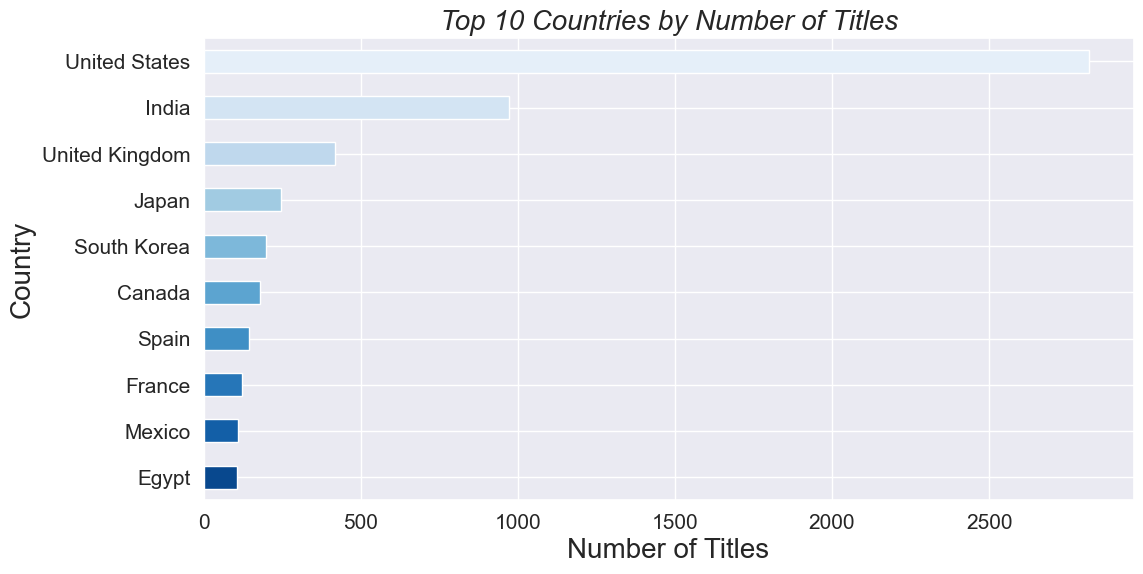

In [8]:
top_countries = df['country'].value_counts().head(10)

colors = sns.color_palette("Blues", len(top_countries ))
top_countries.plot(kind='barh', color=colors)
plt.title('Top 10 Countries by Number of Titles', fontsize=20, fontstyle="italic")
plt.xlabel('Number of Titles', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().invert_yaxis()
plt.show()


📊 **Insight: Top 10 Countries by Number of Titles**

• The United States leads with the highest number of Netflix titles in the dataset.  
• India, the United Kingdom, and Canada also contribute significantly to the platform’s content library.  
• This may indicate Netflix’s strong partnerships and content production in key international markets:  

&nbsp;&nbsp;&nbsp;&nbsp;• Strong presence in **English-speaking countries**  
&nbsp;&nbsp;&nbsp;&nbsp;• Increasing investments in **regional content** (e.g., India)  
&nbsp;&nbsp;&nbsp;&nbsp;• Broader **global expansion strategy** through localized content



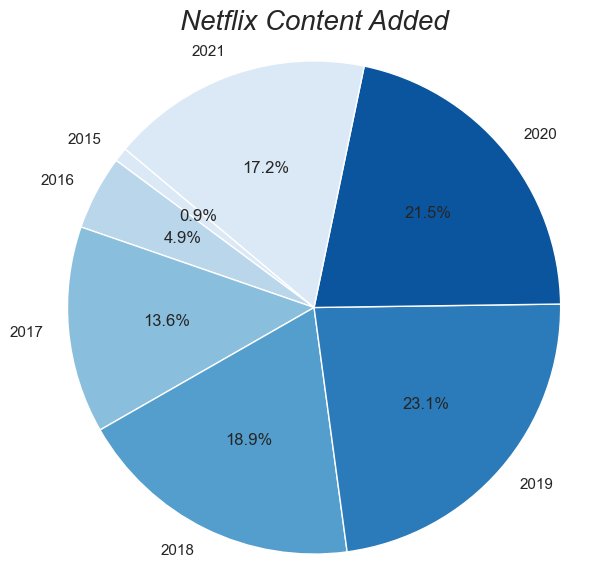

In [123]:
#  ensure the column is integer type
df_clean = df['year_added'].astype(int)

df_filtered = df_clean[df_clean >= 2015]
year_counts = df_filtered.value_counts().sort_index()


plt.figure(figsize=(7, 7))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Netflix Content Added', fontsize=20, fontstyle="italic")
plt.axis('equal')
plt.show()


📊 **Insight: Netflix Content Added**

• Most of the content was added between **2018 and 2020**, showing Netflix’s rapid expansion during that period.  
• A sharp increase around 2020 could be linked to:  

&nbsp;&nbsp;&nbsp;&nbsp;• **COVID-19 pandemic**, which increased demand for digital entertainment  
&nbsp;&nbsp;&nbsp;&nbsp;• **Aggressive content acquisition and production** by Netflix  
&nbsp;&nbsp;&nbsp;&nbsp;• **Global expansion efforts** and rise in regional content offerings  

• Content additions decline slightly post-2020, possibly due to **market saturation or production delays**.


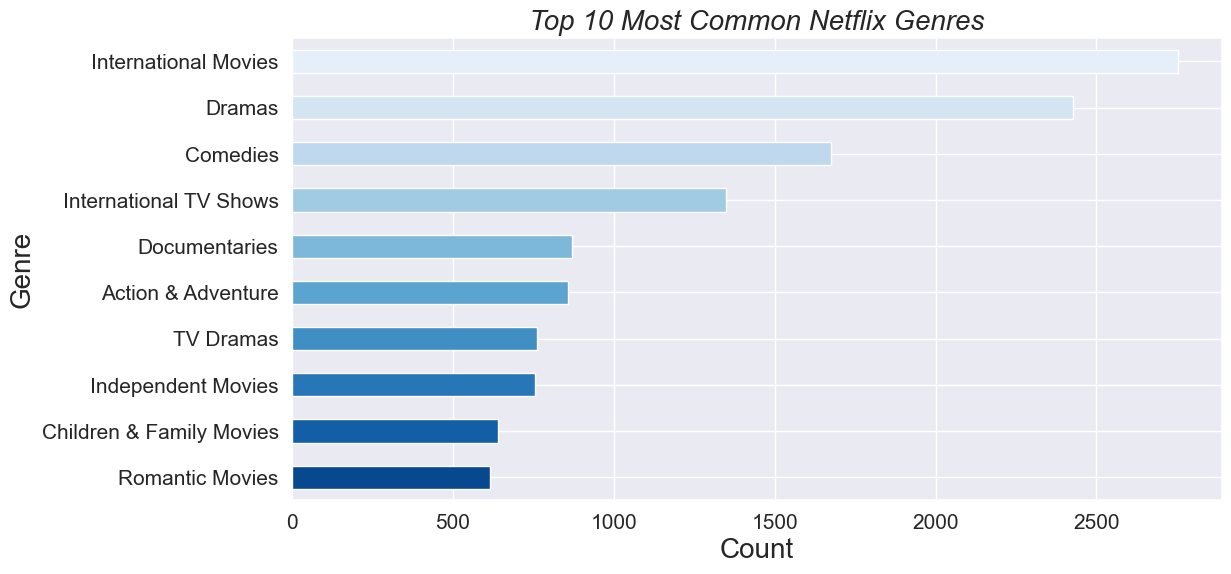

In [97]:
from collections import Counter

genre_list = []
df['listed_in'].dropna().apply(lambda x: genre_list.extend([i.strip() for i in x.split(',')]))
genre_counts = pd.Series(Counter(genre_list)).sort_values(ascending=True).tail(10)

# Horizontal bar with gradient colors
colors = sns.color_palette("Blues_r", len(genre_counts))
genre_counts.plot(kind='barh', color=colors)
plt.title('Top 10 Most Common Netflix Genres', fontsize=20, fontstyle="italic")
plt.xlabel('Count', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


📊 **Insight: Top 10 Most Common Netflix Genres**

• **Dramas** dominate Netflix's content library, indicating a strong audience interest in storytelling and character development.  
• Other frequently appearing genres include:  

&nbsp;&nbsp;&nbsp;&nbsp;• **International Movies** – showing Netflix’s global reach and licensing strategy  
&nbsp;&nbsp;&nbsp;&nbsp;• **Comedies** – appealing to a wide age group with lighter content  
&nbsp;&nbsp;&nbsp;&nbsp;• **Documentaries** – reflecting the rise in demand for factual and real-life storytelling  

• The top genres suggest Netflix balances both **entertainment and educational content** to serve a diverse audience base.


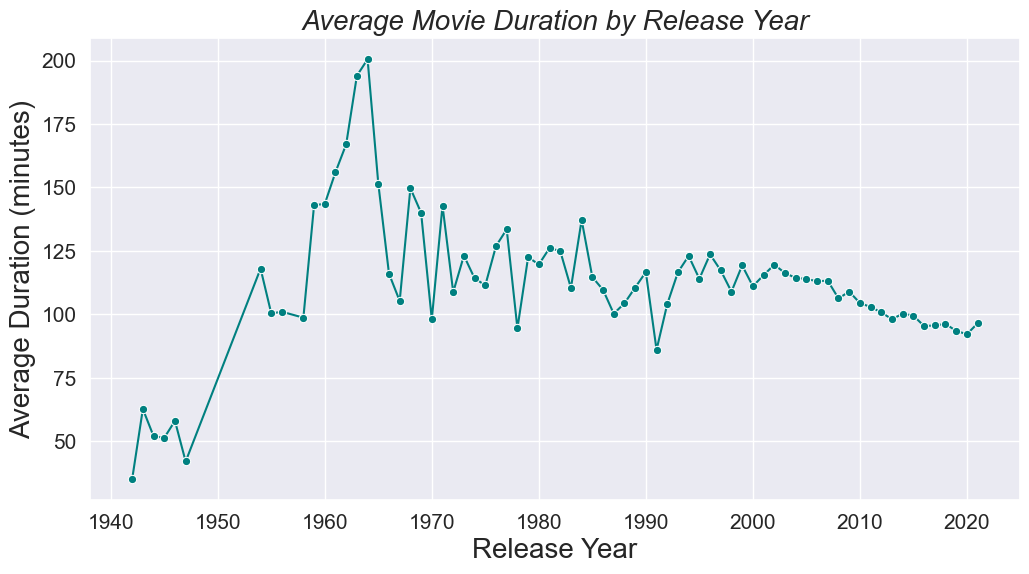

In [124]:
# Extract numeric duration
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# Group by release year and get average duration
duration_by_year = movies.groupby('release_year')['duration_mins'].mean().reset_index()

# Sort by year
duration_by_year = duration_by_year.sort_values('release_year')

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=duration_by_year, x='release_year', y='duration_mins', marker='o', color='teal')
plt.title('Average Movie Duration by Release Year', fontsize=20, fontstyle="italic")
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Average Duration (minutes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()




📈 **Insight: Average Movie Duration by Release Year**

• The trend shows that **average movie durations have remained relatively stable** over the years.  
• Minor fluctuations suggest:  

&nbsp;&nbsp;&nbsp;&nbsp;• A mix of both **short-format films** and **longer feature films**  
&nbsp;&nbsp;&nbsp;&nbsp;• Netflix’s efforts to **diversify content length** based on viewer preferences  

• In recent years, there's a slight **decline** in duration, possibly due to:  

&nbsp;&nbsp;&nbsp;&nbsp;• Rise of **streaming-optimized content** (shorter, mobile-friendly movies)  
&nbsp;&nbsp;&nbsp;&nbsp;• Focus on **independent productions and regional content** which often run shorter than traditional blockbusters


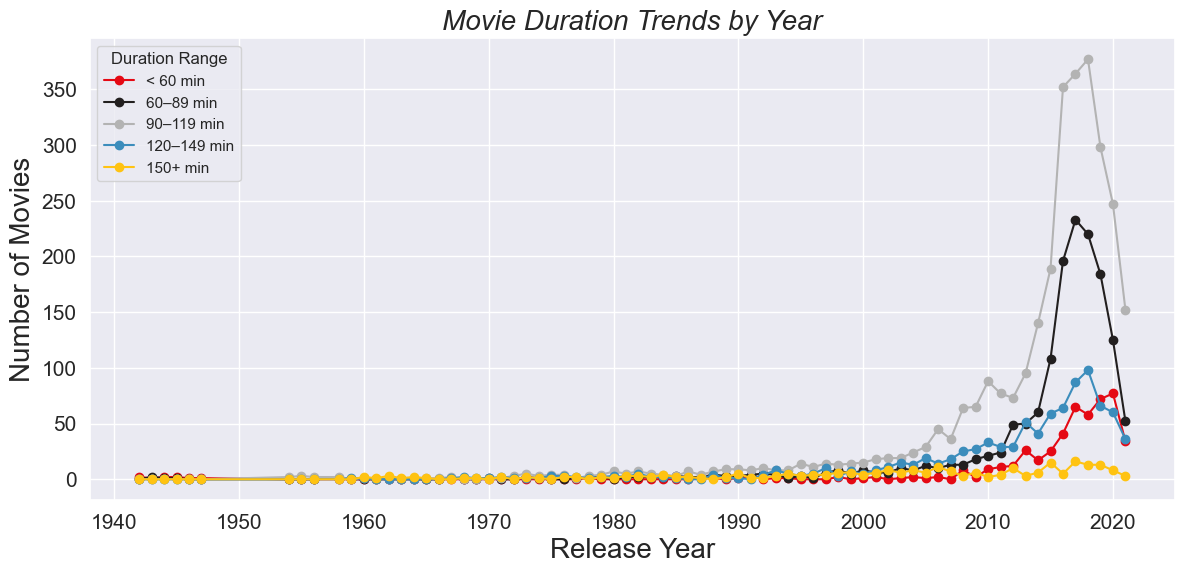

In [118]:
# Netflix-themed custom color palette
netflix_palette = ["#E50914", "#221f1f", "#B3B3B3", "#3C8DBC", "#FFC312"]

# Apply to Seaborn and Matplotlib
sns.set_style("darkgrid")
sns.set_palette(netflix_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=netflix_palette)




# Bin durations into categories
bins = [0, 60, 90, 120, 150, 300]
labels = ['< 60 min', '60–89 min', '90–119 min', '120–149 min', '150+ min']
movies['duration_range'] = pd.cut(movies['duration_mins'], bins=bins, labels=labels)

trend = movies.groupby(['release_year', 'duration_range'], observed=True).size().unstack().fillna(0)

# Plot
trend.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('Movie Duration Trends by Year', fontsize=20, fontstyle="italic")
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Duration Range')
plt.grid(True)
plt.show()


📉 **Insight: Movie Duration Trends by Year**

• Over time, Netflix has consistently added movies across **all duration ranges**, with notable growth in the **60–89 min** and **90–119 min** categories.  
• The **< 60 min** and **150+ min** categories remain the least common, suggesting:

&nbsp;&nbsp;&nbsp;&nbsp;• Shorter films may be niche or targeted toward specific audiences (e.g., documentaries, kids content)  
&nbsp;&nbsp;&nbsp;&nbsp;• Very long films are rare, possibly due to limited viewer engagement or production constraints  

• The **90–119 min** range dominates, indicating that standard-length films are still the most prevalent format.  
• These trends reflect Netflix’s strategy to balance content **variety** with **viewer consumption habits**.


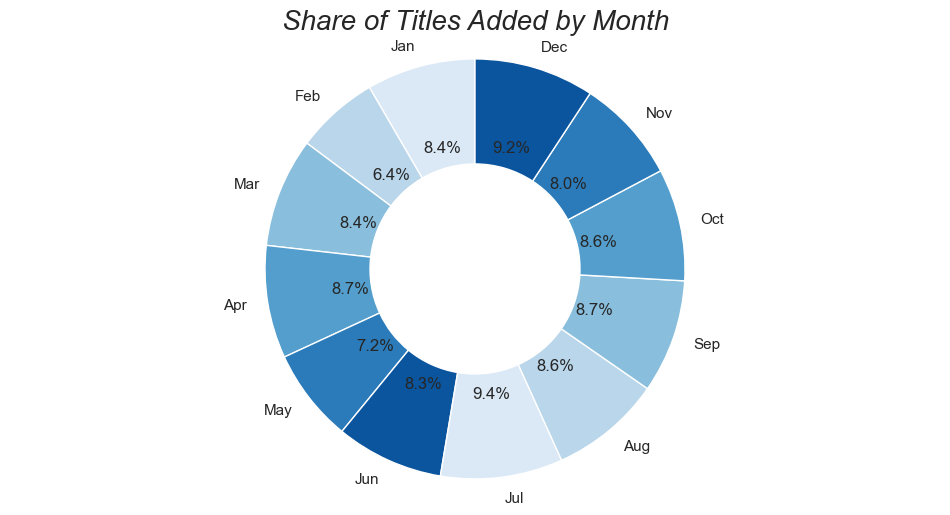

In [125]:
monthly_trend = df['month_added'].value_counts().sort_index()


month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.pie(monthly_trend, labels=month_labels, autopct='%1.1f%%', startangle=90,
       wedgeprops={'width': 0.5})
plt.axis('equal') 
plt.title('Share of Titles Added by Month', fontsize=20, fontstyle="italic")
plt.show()


📆 **Insight: Share of Titles Added by Month**

• Netflix adds content **throughout the year**, but certain months show slightly **higher activity**.

• Peaks are often seen in **December** and **January**, possibly to align with:

  • Holiday seasons and increased viewer engagement  
  • New Year content refresh strategies  

• Content additions are relatively balanced overall, reflecting Netflix’s **ongoing release strategy** rather than seasonal batch updates.

• This consistent stream supports Netflix’s goal of maintaining **viewer retention** year-round.


# 📊 Netflix Content Analysis – Summary 

Here’s a concise summary of key insights from the Netflix dataset:

### 🎬 Content Type Distribution
- **Movies dominate** Netflix’s library compared to TV Shows.
- This shows Netflix’s preference for **short-form, one-time viewing experiences**.

### 🌍 Top Contributing Countries
- **United States** is the top content-producing country.
- **English-speaking countries** (US, UK, Canada, etc.) make up the majority of the catalog.

### 📈 Content Growth Over the Years
- A **steady increase** in the number of titles added since **2015**.
- A major **spike in 2020**, likely due to increased demand during the pandemic.

### 🎭 Popular Genres
- The most common genres are:
  - **International Movies**
  - **Dramas**
  - **Comedies**
- This highlights Netflix’s **global reach and diverse storytelling focus**.

### ⏱️ Average Movie Duration
- Most movies are between **90 to 120 minutes**.
- Duration has stayed relatively **consistent over time**.

### 📊 Movie Duration Trends
- **Shorter movies (<90 min)** are most common.
- There’s been a **rise in longer-duration films** in recent years.

### 🗓️ Monthly Addition Trend
- Content is added throughout the year.
- Slightly more titles are added in **December and January**, likely aligned with the **holiday season**.

---

📌 These insights give a better understanding of **Netflix’s content strategy, viewer preferences, and platform trends** over time.
